# 베스트 앨범
https://school.programmers.co.kr/learn/courses/30/lessons/42579

**문제 설명**  
스트리밍 사이트에서 장르 별로 가장 많이 재생된 노래를 두 개씩 모아 베스트 앨범을 출시하려 합니다. 노래는 고유 번호로 구분하며, 노래를 수록하는 기준은 다음과 같습니다.  

1. 속한 노래가 많이 재생된 장르를 먼저 수록합니다.
2. 장르 내에서 많이 재생된 노래를 먼저 수록합니다.
3. 장르 내에서 재생 횟수가 같은 노래 중에서는 고유 번호가 낮은 노래를 먼저 수록합니다.

노래의 장르를 나타내는 문자열 배열 genres와 노래별 재생 횟수를 나타내는 정수 배열 plays가 주어질 때,  
베스트 앨범에 들어갈 노래의 고유 번호를 순서대로 return 하도록 solution 함수를 완성하세요.  

**제한사항**  
- genres[i]는 고유번호가 i인 노래의 장르입니다.
- plays[i]는 고유번호가 i인 노래가 재생된 횟수입니다.
- genres와 plays의 길이는 같으며, 이는 1 이상 10,000 이하입니다.
- 장르 종류는 100개 미만입니다.
- 장르에 속한 곡이 하나라면, 하나의 곡만 선택합니다.
- 모든 장르는 재생된 횟수가 다릅니다.

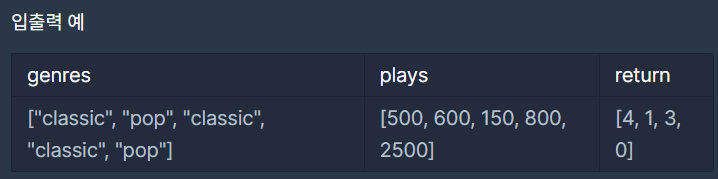

In [ ]:
genres = ["classic", "pop", "classic", "classic", "pop"]
plays = [500, 600, 150, 800, 2500]

In [ ]:
def solution(genres, plays):
    answer = []
    total = {}
    music = {}
    
    for idx, (g,p) in enumerate(zip(genres, plays)):
        if g not in total:
            total[g] = 0
        total[g] += p
        if g not in music:
            music[g] = []
        music[g].append((idx,p))
    
    print("-----장르별 총 재생 횟수-----\n")
    print(total)
    print("\n-----장르별 묶음-----\n")
    print(music)
    
    sorted_total = sorted(total.keys(), key = lambda x : total[x], reverse = True)
    print("\n-----장르 순서 정렬-----\n")
    print(sorted_total)
    
    
    for ge in sorted_total:
        sorted_music = sorted(music[ge], key = lambda x : x[1], reverse=True)
        # 리스트 풀어서 append하기 = extend
        print(f"{ge}의 정렬된 값들 : {sorted_music[:2]}")
        answer.extend(idx for idx, _ in sorted_music[:2])
    print("----정렬된 인덱스 값들-----")
    print(answer)
    return answer

solution(genres, plays)

In [ ]:
## gpt 정답
from collections import defaultdict

def solution(genres, plays):
    # 장르별 총 재생수
    total = defaultdict(int)
    # 장르별 곡 목록: (재생수, 고유번호)
    songs = defaultdict(list)

    for i, (g, p) in enumerate(zip(genres, plays)):
        total[g] += p
        songs[g].append((p, i))

    # 1) 장르를 총 재생수 기준 내림차순 정렬
    genre_order = sorted(total.keys(), key=lambda g: total[g], reverse=True)

    answer = []
    for g in genre_order:
        # 2) 장르 내 곡 정렬: 재생수 내림차순, 고유번호 오름차순
        top = sorted(songs[g], key=lambda x: (-x[0], x[1]))[:2]
        # 3) 최대 2곡 뽑기
        answer.extend([i for _, i in top])

    return answer


## 여기서 공부한거 두개!
- list.append에서 리스트에 넣느 값들이 리스트여서 풀어서 넣고 싶다 하면!    
    - extend() 사용!


- dict values 값 입력할때 초기화 문제 발생!
    - defaultdict()사용!

        ```
        # 장르별 총 재생수
        total = defaultdict(int)
        # 장르별 곡 목록: (재생수, 고유번호)
        songs = defaultdict(list)
        ```